# Predictive Maintenance

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix

import imblearn

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

SEED = 123

## Load Data

In [2]:
data1 = pd.read_csv(r'C:\Users\user\Downloads\ai4i2020.xls')
data = data1.copy()

In [3]:
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## Dropping columns

In [5]:
data = data.drop(columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'UDI'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [6]:
print(data['Type'].unique())

['M' 'L' 'H']


In [7]:
len(data['Product ID'].unique())

10000

In [8]:
##For Type we will add dummy variables and we will drop Product ID since it is just a not meaningful

In [9]:
data = data.drop(columns = ['Product ID'])

In [10]:
dummies = pd.get_dummies(data['Type'], prefix=None)
data = pd.concat([data, dummies], axis=1)

In [11]:
data = data.drop(columns = ['Type'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
 6   H                        10000 non-null  bool   
 7   L                        10000 non-null  bool   
 8   M                        10000 non-null  bool   
dtypes: bool(3), float64(3), int64(3)
memory usage: 498.2 KB


## Feature visualization

In [12]:
h_nums = data['H'].sum()
m_nums = data['M'].sum()
l_nums = data['L'].sum()
print(h_nums, m_nums, l_nums)

1003 2997 6000


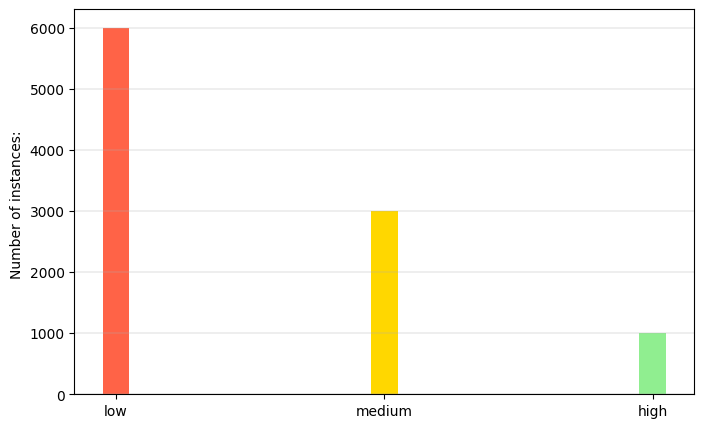

In [13]:
plt.figure(figsize=(8,5))

plt.ylabel('Number of instances: ')
plt.bar(['low', 'medium', 'high'], [l_nums, m_nums, h_nums], width=0.1, color=['tomato', 'gold', 'lightgreen'])
plt.grid(axis = 'y', linewidth = 0.3)
plt.show() 

## Class Balance

In [14]:
failed = np.sum(data['Machine failure'] == 1)
not_failed = np.sum(data['Machine failure'] == 0)
print(failed, not_failed)

339 9661


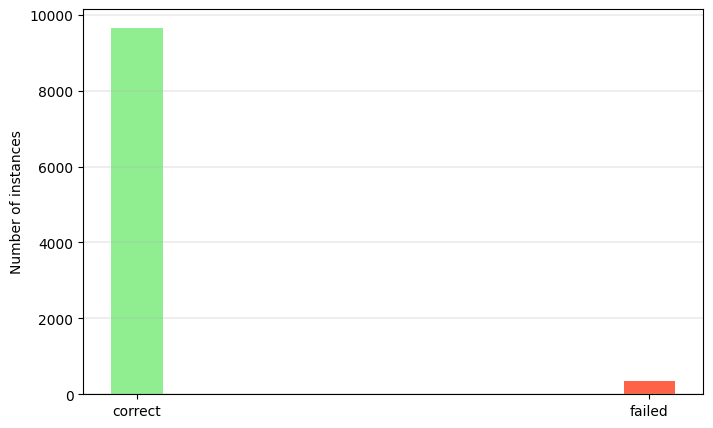

In [15]:
plt.figure(figsize=(8,5))
plt.ylabel('Number of instances')
plt.bar(['correct', 'failed'], [not_failed, failed], width=0.1, color=['lightgreen', 'tomato'])
plt.grid(axis = 'y', linewidth=0.3)
plt.show()

In [16]:
## This data is heavily imbalanced.

## Train-test split

In [17]:
y = data['Machine failure']
X = data.drop(columns = ['Machine failure'])

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify =y, random_state=SEED)

In [19]:
np.bincount(y_train)

array([7729,  271], dtype=int64)

## Stratification: visual check

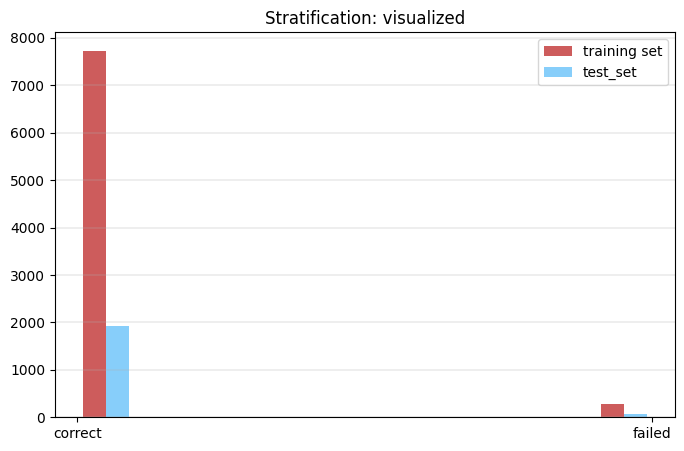

In [20]:
plt.figure(figsize = (8, 5))
plt.title('Stratification: visualized')
plt.xticks([0,1], ['correct', 'failed'])
plt.hist([y_train, y_test], color=['indianred', 'lightskyblue'], label=['training set', 'test_set'])
plt.legend(loc='best')
plt.grid(axis='y', linewidth=0.3)
plt.show()

## 1. Resampling: oversampling

In [21]:
ratio = 1/5
ros = imblearn.over_sampling.RandomOverSampler(random_state=SEED, sampling_strategy=ratio)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [22]:
np.bincount(y_train_resampled)

array([7729, 1545], dtype=int64)

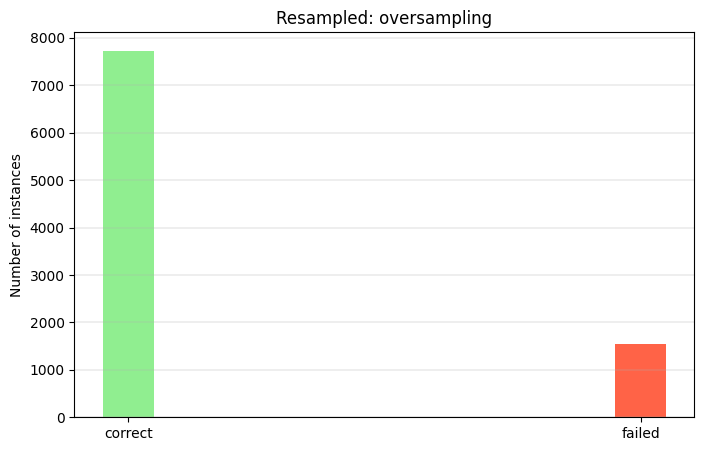

In [23]:
plt.figure(figsize=(8,5))
plt.ylabel('Number of instances')
plt.bar(['correct', 'failed'], [np.bincount(y_train_resampled)[0], np.bincount(y_train_resampled)[1]], width=0.1, color=['lightgreen', 'tomato'])
plt.title('Resampled: oversampling')
plt.grid(axis = 'y', linewidth=0.3)
plt.show()

## 1.1. Logistic Regression model: oversampling

In [24]:
grid_model = Pipeline(steps=[('scaler', preprocessing.StandardScaler()),
                             ('lr', LogisticRegression())])
params = {
    'lr__C' : [0.05, 0.1, 0.2],
    'lr__solver' : ['newton-cg', 'lbfgs']
}
grid_search = model_selection.GridSearchCV(grid_model, param_grid=params, scoring ='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters found:  {'lr__C': 0.2, 'lr__solver': 'lbfgs'}
Best cross-validation score:  0.9020914930055799


In [25]:
y_pred_ros = best_model.predict(X_test)
log_acc_ros = accuracy_score(y_test, y_pred_ros)
print(f"Test Accuracy: {log_acc_ros:.4f}")

Test Accuracy: 0.9460


<Figure size 1000x600 with 0 Axes>

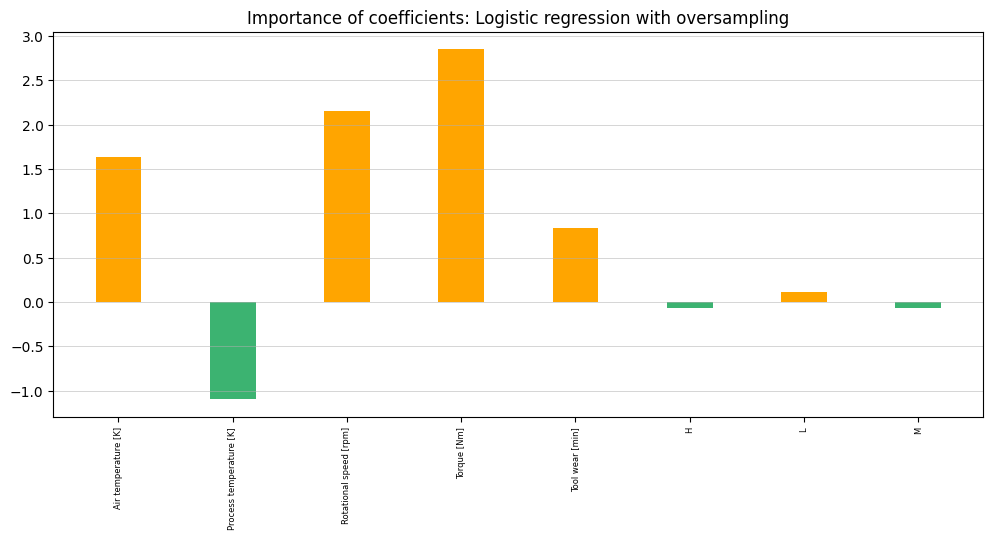

In [26]:
values = best_model.named_steps['lr'].coef_[0]
feature_names = X.columns
plt.figure(figsize = (10,6))
N = len(feature_names)
plt.figure(figsize=(12, 5))
plt.bar(np.arange(0, N), values, color=['orange' if v >= 0 else 'mediumseagreen' for v in values], width = 0.4)
plt.xticks(np.arange(0, N), feature_names, rotation='vertical', fontsize = 6)
plt.grid(axis='y', linewidth = 0.37)
plt.title('Importance of coefficients: Logistic regression with oversampling')

plt.show()

## 2. Resampling: undersampling

In [27]:
np.bincount(y_train)

array([7729,  271], dtype=int64)

In [28]:
ratio = 1/5
rus = imblearn.under_sampling.RandomUnderSampler(random_state=SEED, sampling_strategy=ratio)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train,y_train)

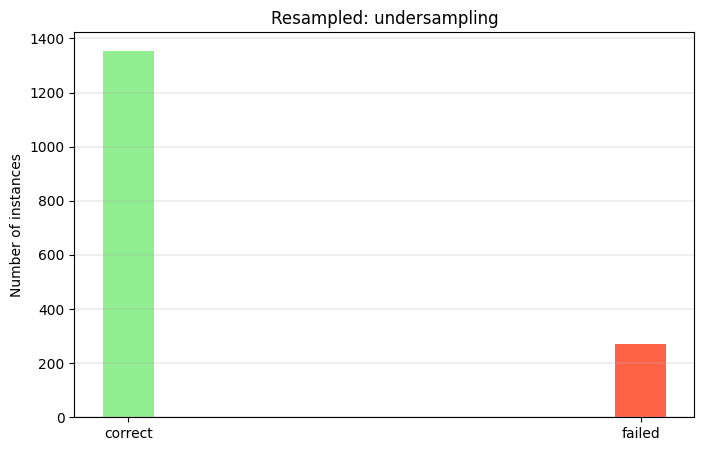

In [29]:
plt.figure(figsize=(8,5))
plt.ylabel('Number of instances')
plt.bar(['correct', 'failed'], [np.bincount(y_train_resampled)[0], np.bincount(y_train_resampled)[1]], width=0.1, color=['lightgreen', 'tomato'])
plt.title('Resampled: undersampling')
plt.grid(axis = 'y', linewidth=0.3)
plt.show()

## 2.1. Logistic Regression model: undersampling

In [30]:
grid_model = Pipeline(steps = [('scaler', preprocessing.StandardScaler()),
                               ('lr', LogisticRegression())])
params = {
    'lr__C' : [0.05, 0.1, 0.2],
    'lr__solver' : ['newton-cg', 'lbfgs'] 
}

grid_search = model_selection.GridSearchCV(grid_model, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters found:  {'lr__C': 0.2, 'lr__solver': 'newton-cg'}
Best cross-validation score:  0.8973062765455403


In [31]:
y_pred_rus = best_model.predict(X_test)
log_acc_rus = accuracy_score(y_test, y_pred_rus)
print(f"Test Accuracy: {log_acc_rus:.4f}")

Test Accuracy: 0.9510


<Figure size 1000x600 with 0 Axes>

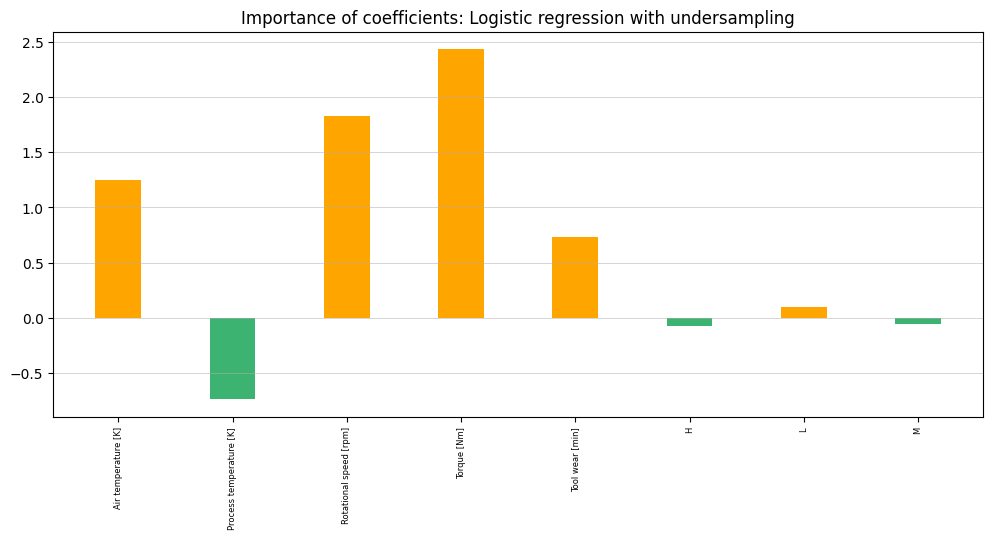

In [32]:
values = best_model.named_steps['lr'].coef_[0]
feature_names = X.columns
plt.figure(figsize = (10,6))
N = len(feature_names)
plt.figure(figsize=(12, 5))
plt.bar(np.arange(0, N), values, color=['orange' if v >= 0 else 'mediumseagreen' for v in values], width = 0.4)
plt.xticks(np.arange(0, N), feature_names, rotation='vertical', fontsize = 6)
plt.grid(axis='y', linewidth = 0.37)
plt.title('Importance of coefficients: Logistic regression with undersampling')
plt.show()

## Resampling: SMOTE

In [33]:
smote = imblearn.over_sampling.SMOTE(random_state=0, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [34]:
np.bincount(y_train_resampled)

array([7729, 7729], dtype=int64)

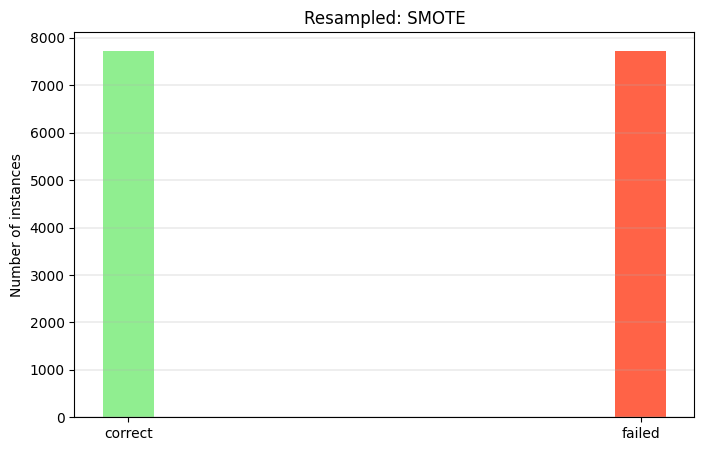

In [35]:
plt.figure(figsize=(8,5))
plt.ylabel('Number of instances')
plt.bar(['correct', 'failed'], [np.bincount(y_train_resampled)[0], np.bincount(y_train_resampled)[1]], width=0.1, color=['lightgreen', 'tomato'])
plt.title('Resampled: SMOTE')
plt.grid(axis = 'y', linewidth=0.3)
plt.show()

## 3. Logistic Regression model: SMOTE

In [36]:
grid_model = Pipeline(steps = [('scaler', preprocessing.StandardScaler()),
                               ('lr', LogisticRegression())])
params = {
    'lr__C' : [0.05, 0.1, 0.2],
    'lr__solver' : ['newton-cg', 'lbfgs'] 
}

grid_search = model_selection.GridSearchCV(grid_model, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters found:  {'lr__C': 0.2, 'lr__solver': 'lbfgs'}
Best cross-validation score:  0.8934529491998427


In [37]:
y_pred_smote = best_model.predict(X_test)
log_acc_smote = accuracy_score(y_test, y_pred_smote)
print(f"Test Accuracy: {log_acc_smote:.4f}")

Test Accuracy: 0.8845


<Figure size 1000x600 with 0 Axes>

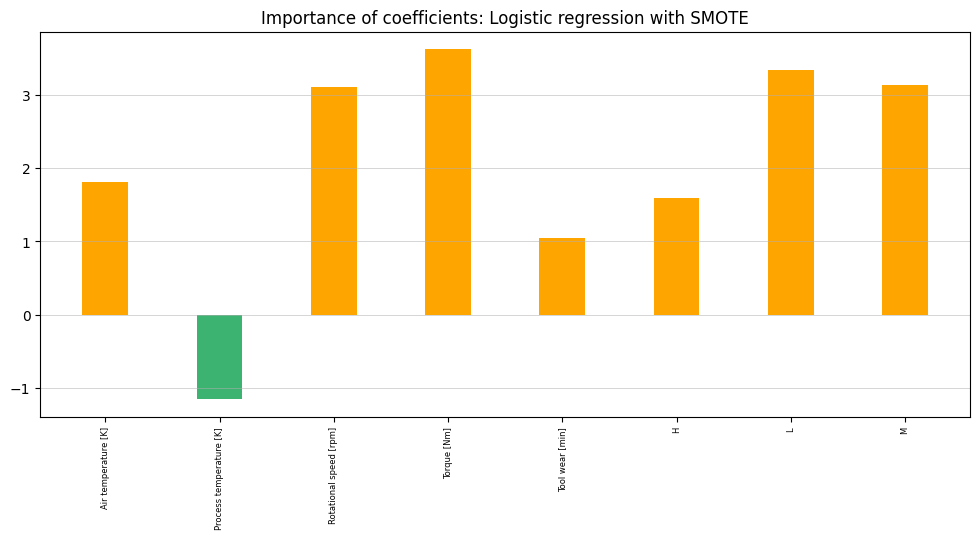

In [38]:
values = best_model.named_steps['lr'].coef_[0]
feature_names = X.columns
plt.figure(figsize = (10,6))
N = len(feature_names)
plt.figure(figsize=(12, 5))
plt.bar(np.arange(0, N), values, color=['orange' if v >= 0 else 'mediumseagreen' for v in values], width = 0.4)
plt.xticks(np.arange(0, N), feature_names, rotation='vertical', fontsize = 6)
plt.grid(axis='y', linewidth = 0.37)
plt.title('Importance of coefficients: Logistic regression with SMOTE')

plt.show()

## Comparing different models

### Comparing confusion matrices

In [39]:
print("Confusion matrix: undersampling")
print(confusion_matrix(y_test, y_pred_rus))
print("Confusion matrix: oversampling")
print(confusion_matrix(y_test, y_pred_ros))
print("Confusion matrix: SMOTE")
print(confusion_matrix(y_test, y_pred_smote))

Confusion matrix: undersampling
[[1868   64]
 [  34   34]]
Confusion matrix: oversampling
[[1857   75]
 [  33   35]]
Confusion matrix: SMOTE
[[1724  208]
 [  23   45]]


### Comparing accuracies

In [40]:
accuracies = [log_acc_rus, log_acc_ros, log_acc_smote]
labels = ['Accuracy: Undersampling', 'Accuracy: Oversampling', 'Accuracy: SMOTE']

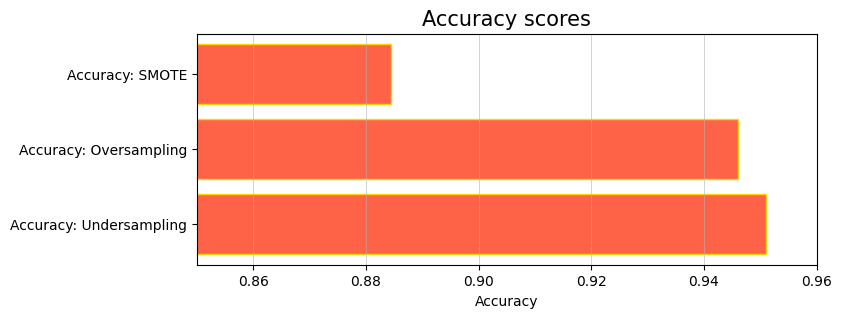

In [41]:
plt.figure(figsize = (8,3))
plt.title("Accuracy scores", fontsize=15)
plt.xlabel("Accuracy", fontsize=10)
plt.grid(axis = 'x', linewidth = 0.4)

plt.barh(labels, accuracies, color= 'tomato', edgecolor='gold')

plt.xlim(0.85, 0.96)

plt.show()